Deneme 1: Başarı Oranı: %0.00
Deneme 2: Başarı Oranı: %100.00
Deneme 3: Başarı Oranı: %100.00
Deneme 4: Başarı Oranı: %0.00
Deneme 5: Başarı Oranı: %100.00
Deneme 6: Başarı Oranı: %100.00
Deneme 7: Başarı Oranı: %100.00
Deneme 8: Başarı Oranı: %0.00
Deneme 9: Başarı Oranı: %100.00
Deneme 10: Başarı Oranı: %100.00
Ortalama Başarı Oranı: %70.00


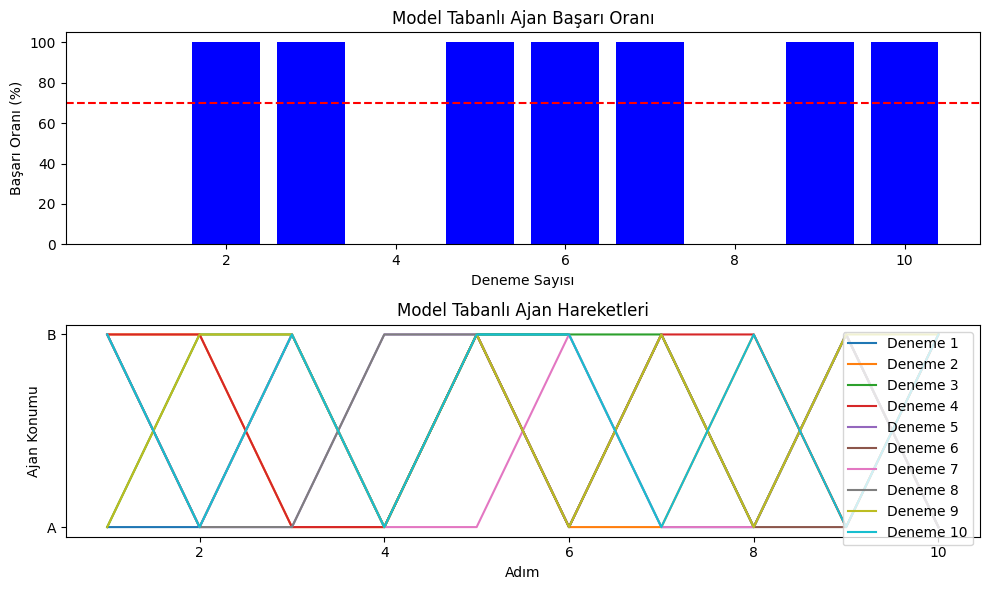

In [21]:
import random
import matplotlib.pyplot as plt

class Cevre:
    def __init__(self):
        self.konumlar = ['A', 'B']
        self.durum = {konum: random.choice(['Temiz', 'Kirli']) for konum in self.konumlar}
        self.ajan_konumu = random.choice(self.konumlar)

    def temiz_mi(self):
        return all(durum == 'Temiz' for durum in self.durum.values())

class Ajan:
    def __init__(self, cevre):
        self.cevre = cevre

    def harekete_gec(self):
        raise NotImplementedError

class ModelTabanliAjan(Ajan):
    def __init__(self, cevre):
        super().__init__(cevre)
        self.model = {konum: 'Bilinmeyen' for konum in cevre.konumlar}

    def harekete_gec(self):
        self.model[self.cevre.ajan_konumu] = self.cevre.durum[self.cevre.ajan_konumu]
        if self.cevre.durum[self.cevre.ajan_konumu] == 'Kirli':
            self.cevre.durum[self.cevre.ajan_konumu] = 'Temiz'
        else:
            self.cevre.ajan_konumu = 'A' if self.cevre.ajan_konumu == 'B' else 'B'

def simülasyon_calistir_model(deneme_sayisi=10, adim_sayisi=10):
    basari_oranlari = []
    tum_hareketler = []

    for deneme in range(deneme_sayisi):
        cevre = Cevre()
        ajan = ModelTabanliAjan(cevre)
        hareketler = []
        for _ in range(adim_sayisi):
            ajan.harekete_gec()
            hareketler.append(cevre.ajan_konumu)
            for konum in cevre.konumlar:
                if random.random() < 0.1:
                    cevre.durum[konum] = 'Kirli'
        basari = 100 if cevre.temiz_mi() else 0
        basari_oranlari.append(basari)
        tum_hareketler.append(hareketler)
        print(f"Deneme {deneme + 1}: Başarı Oranı: %{basari:.2f}")

    ortalama_basari = sum(basari_oranlari) / deneme_sayisi
    print(f"Ortalama Başarı Oranı: %{ortalama_basari:.2f}")

    # Görselleştirme
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.bar(range(1, deneme_sayisi + 1), basari_oranlari, color='blue')
    plt.axhline(y=ortalama_basari, color='red', linestyle='--')
    plt.xlabel('Deneme Sayısı')
    plt.ylabel('Başarı Oranı (%)')
    plt.title('Model Tabanlı Ajan Başarı Oranı')

    plt.subplot(2, 1, 2)
    for deneme, hareketler in enumerate(tum_hareketler):
        plt.plot(range(1, len(hareketler) + 1), hareketler, label=f'Deneme {deneme + 1}')
    plt.xlabel('Adım')
    plt.ylabel('Ajan Konumu')
    plt.title('Model Tabanlı Ajan Hareketleri')
    plt.legend()
    plt.tight_layout()
    plt.show()

simülasyon_calistir_model()

